# zad_18_1

Stwórz model klasyfikacji, w oparciu o architekturę sieci neuronowych. Naucz model klasyfikować gatunki kwiatów, wykorzystując zbiór Iris. Pamiętaj, że jest to klasyfikacja wieloklasowa, w związku z tym w ostatniej warstwie sieci powinna być funkcja aktywacji Softmax.

In [54]:
# import
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [55]:
# wczytanie danyc

iris = load_iris()
X = iris.data
y = iris.target


In [56]:
# podzial zbioru na treningowy i testowy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [57]:
#standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
#  Konwersja etykiet 
y_train = keras.utils.to_categorical(y_train, num_classes=3)
y_test = keras.utils.to_categorical(y_test, num_classes=3)


In [59]:
# Kompilacja modelu
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [60]:
# Trenowanie
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.3, verbose=1)

Epoch 1/50


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.9589 - loss: 0.1369 - val_accuracy: 1.0000 - val_loss: 0.1082
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9589 - loss: 0.1295 - val_accuracy: 1.0000 - val_loss: 0.1087
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9589 - loss: 0.1259 - val_accuracy: 1.0000 - val_loss: 0.1068
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9589 - loss: 0.1225 - val_accuracy: 1.0000 - val_loss: 0.1014
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9589 - loss: 0.1188 - val_accuracy: 1.0000 - val_loss: 0.0985
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9589 - loss: 0.1160 - val_accuracy: 1.0000 - val_loss: 0.0962
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9589 - loss: 0.1126 - val_accuracy: 1.0000 - val_loss: 0.0952
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9589 - loss: 0.1092 - val_accuracy: 1.0000 - val_loss: 0.

In [61]:
#  Ewaluacja
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Dokładność na zbiorze testowym: {accuracy:.4f}")

Dokładność na zbiorze testowym: 0.9333


In [62]:
# Predykcje na zbiorze testowym
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)   # klasy przewidziane
y_true = np.argmax(y_test, axis=1)         # klasy prawdziwe

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000191ED0CAE80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [63]:
#  Raport klasyfikacji
target_names = ["setosa", "versicolor", "virginica"]  # ręczne nazwy klas
print("\nRaport klasyfikacji:\n")
print(classification_report(y_true, y_pred, target_names=target_names))


Raport klasyfikacji:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.83      1.00      0.91        15
   virginica       1.00      0.80      0.89        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



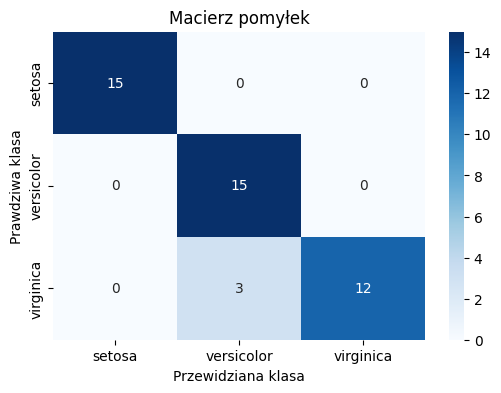

In [64]:
#  Macierz pomyłek
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names,
            yticklabels=target_names)
plt.xlabel("Przewidziana klasa")
plt.ylabel("Prawdziwa klasa")
plt.title("Macierz pomyłek")
plt.show()

Setosa: 
    precisio = 1 , recall =1  - model zawsze prawidlowo rozpoznaje setosa

versicolor: 
    precision= 1 wszystkie predykcje oznaczone jako versicolor byly faktycznie versicolor
    recall = 0,87, model nie rozpoznal kilku przypadkow vericolor  i błednie je zaklasyfikowal jako virginica

virginica
   precision = 0,88 - model czasem myli inne gatunki z virginca
   recall = 1 wszystkie virginica zostały prawidłowo oznaczone


 96% poprawnych klasyfikacji, co jest dobry wynikiem

